In [208]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Image

## 2.4 Problem 2 ##

a) Regression problem, inference. N = 500 (firms), p = 3 (profit, number of employees, and industry)

b) Classification, prediction. N = 20, p = 13 (product price, marketing budget, competition price + 10 other variables).

c) Regression, prediction. N = 52, p = 3 (% change in US market, % change in British market, % change in German market).

## 2.4 Problem 3a ##

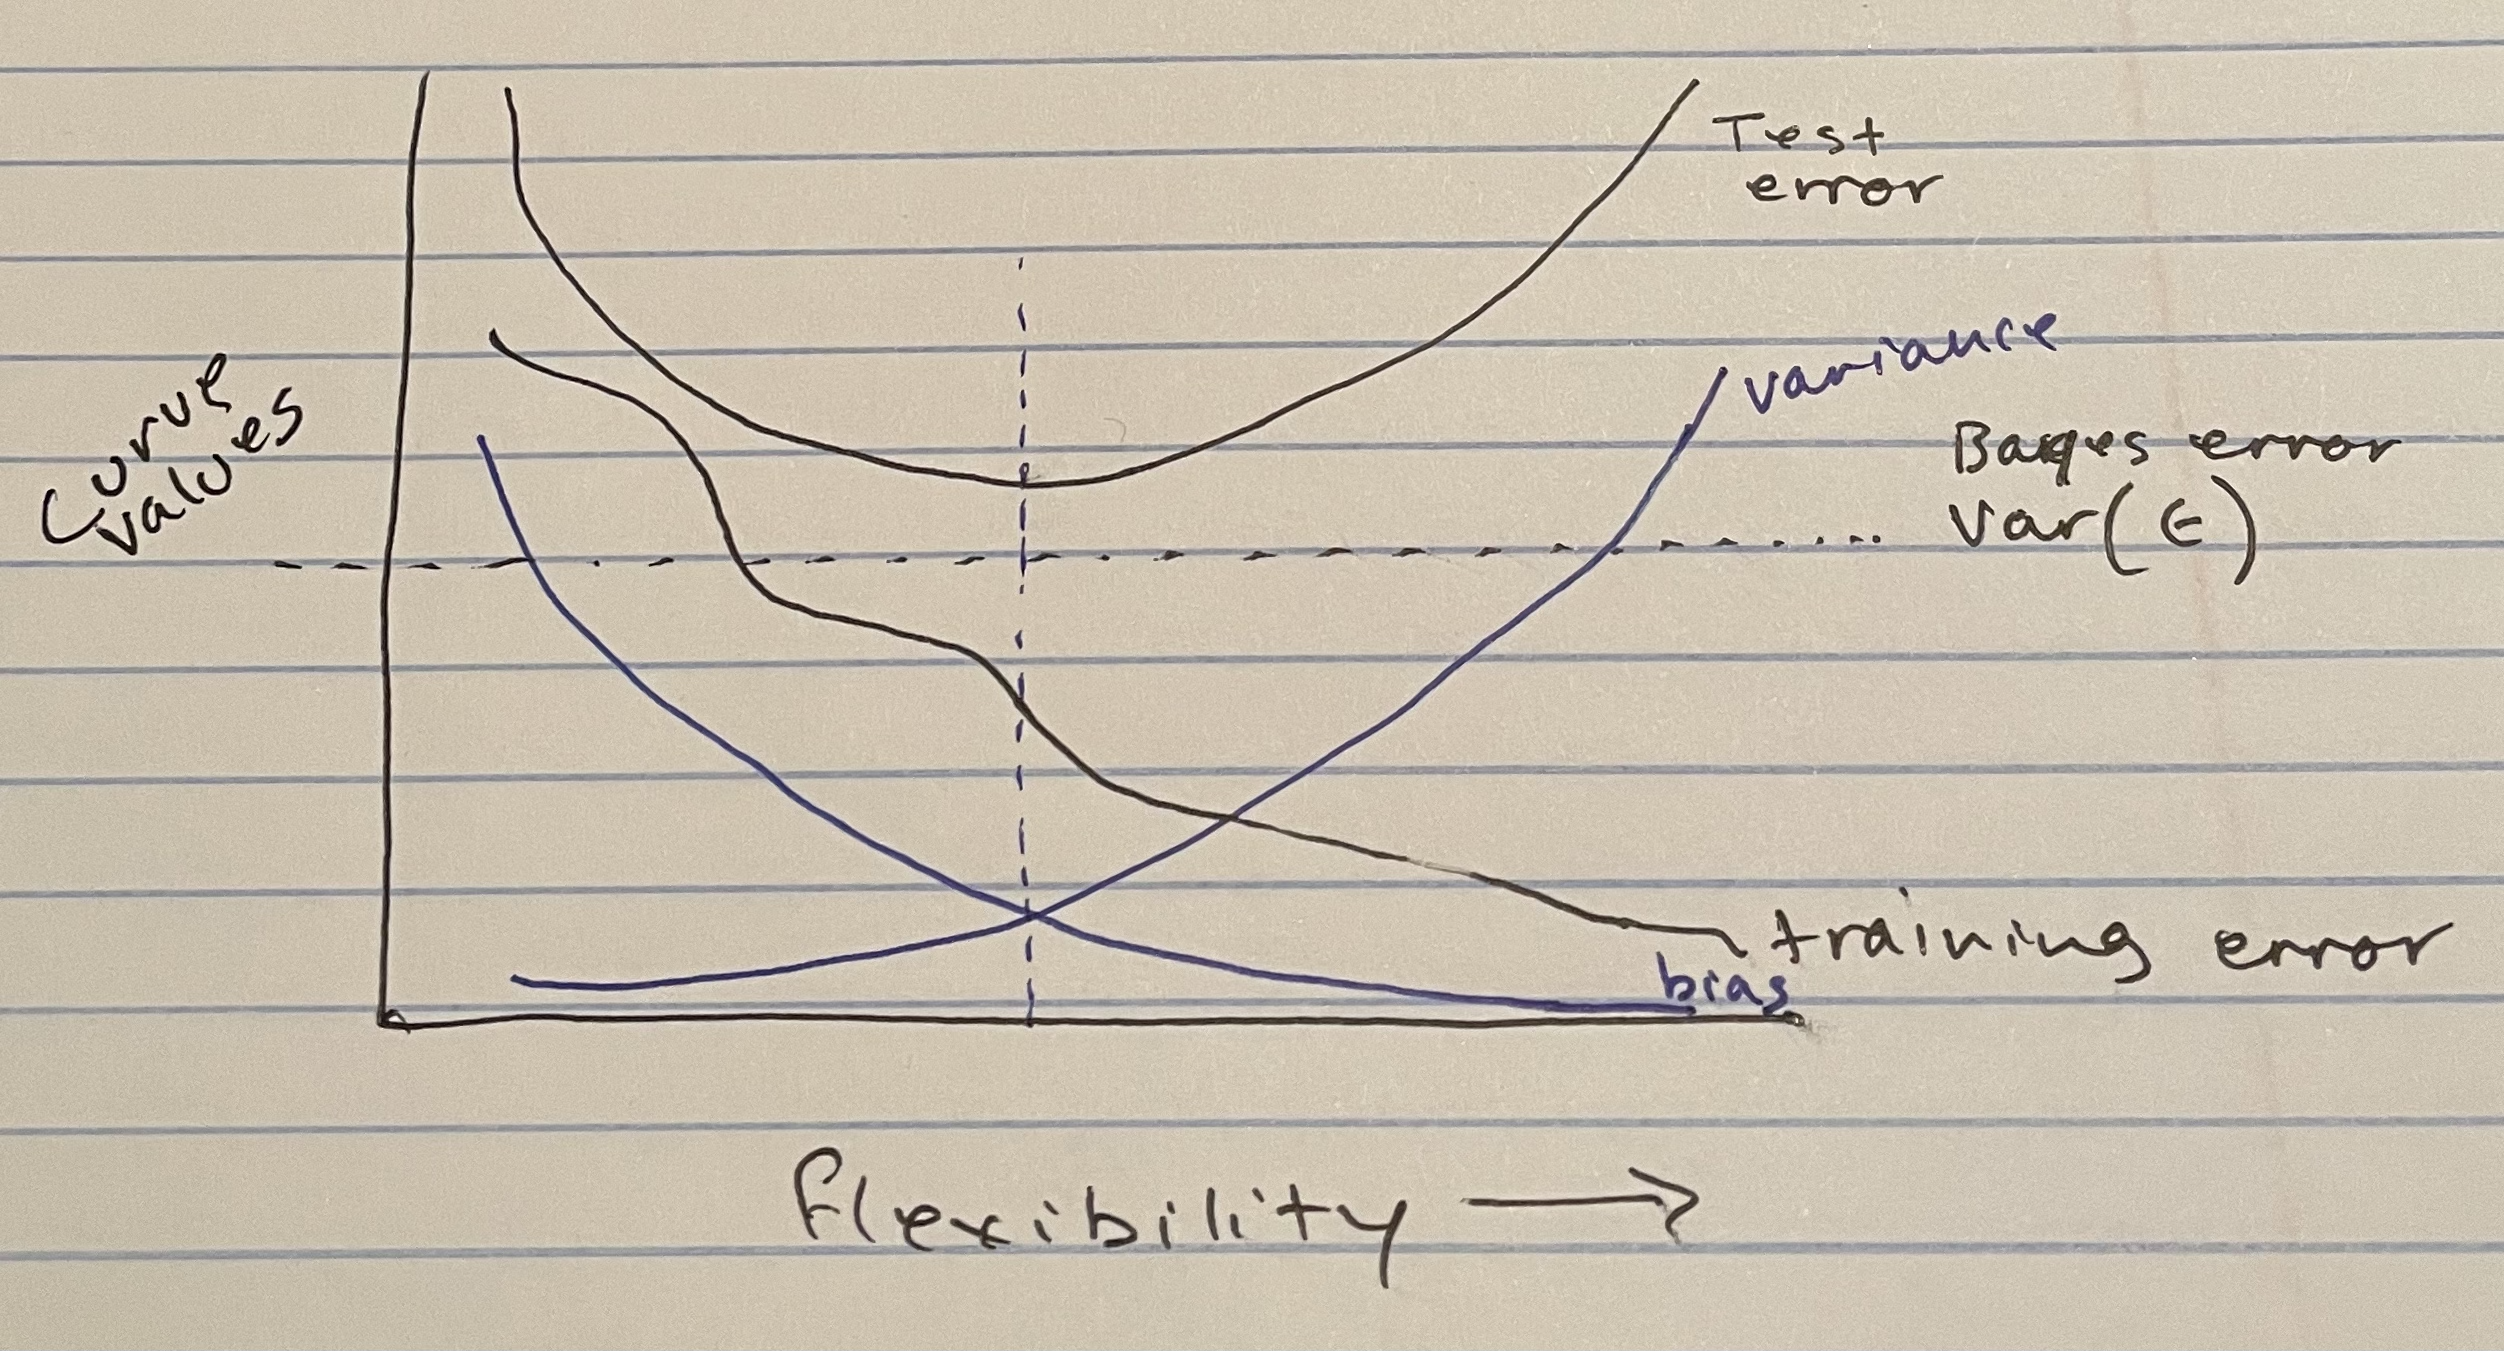

In [210]:
Image("Homework3Problem3.png")

## 2.4 Problem 3b ##
As flexibility increases, the squared bias decreases and variance increases, demonstrating the bias-variance tradeoff. 

Variance is the amount by which our model would change if we estimated it using a different training data set. More flexible methods have higher variance because the model follows each observation very closely; if any data point changed, the estimate of the model would change a lot too.

Bias is error that is introduced by approximating a real-life problem. As flexibility increases, bias generally decreases, meaning the error inherent in modeling real-life decreases.

As flexibility increases, bias decreases faster than variance increases, leading test error to decrease. Where variance increases faster than bias decreases, test error goes up.

Training error decreases with flexibility because adding more predictors causes it to decline monotonically.

Bayes error/irreducible error is constant and irreducible, so it does not change regardless of the flexibility of the model.

## 2.4 Problem 7 ##

Part a - Euclidean distances between observations and (0,0,0)

Obs 1: 3

Obs 2: 2

Obs 3: sqrt(10)

Obs 4: sqrt(5)

Obs 5: sqrt(2)

Obs 6: sqrt(3)

Part b - Green. With K=1, the closest single point to (0,0,0) is observation 5, which is green.

Part c - Red. With K=3, the three closest points are 5, 6, and 2. 5 is green, but 6 and 2 are both red. 

Therefore Pr(Y=Red | X = x_0) = 2/3 > 0.5

Part d - small. Because the Bayes decision boundary is highly nonlinear, the best value for K would have a high degree of flexibility. This occurs when K is small.

In [211]:
boston = pd.read_csv('Boston.csv', index_col=0)

## Problem 10a ##

Each of the 506 rows represents data on one town in the Boston area over an unspecified period of time.

In [212]:
len(boston)

506

Each of the 14 columns represents a different variable that has values for each row (town in the boston area).

In [213]:
len(boston.columns)

14

## Problem 10b ##

## Crime v median value of owner-occupied homes ##
In towns with higher median values of owner occupied homes, the per capita crime rate is lower.

Text(0.5, 1.0, 'Crime v median value of owner-occupied homes in $1000s')

Text(0, 0.5, 'Per capita crime rate by town')

Text(0.5, 0, 'Median value of owner-occupied homes')

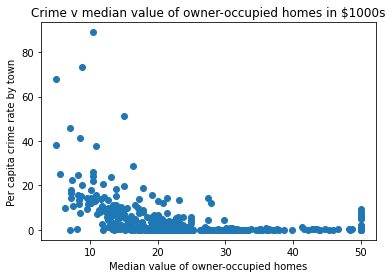

In [214]:
plt.scatter(x=boston['medv'], y=boston['crim'])
plt.title("Crime v median value of owner-occupied homes in $1000s")
plt.ylabel("Per capita crime rate by town")
plt.xlabel("Median value of owner-occupied homes")
plt.show()

## Crime v accessiblity to radial highways ##
Towns that are farther from radial highways have higher per capita crime rates, though there are no towns with an index between 10 and 20. This means the index produces strange results or all towns are either close to or far away from highways, with no in-between.

Text(0.5, 1.0, 'Crime v accessibility to radial highways')

Text(0, 0.5, 'Per capita crime rate by town')

Text(0.5, 0, 'Index of accessibility to radial highways')

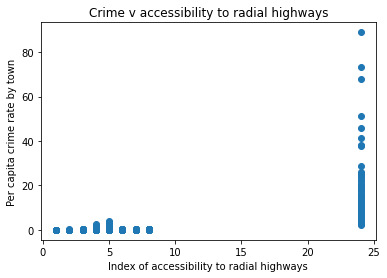

In [215]:
plt.scatter(x=boston['rad'], y=boston['crim'])
plt.title("Crime v accessibility to radial highways")
plt.ylabel("Per capita crime rate by town")
plt.xlabel("Index of accessibility to radial highways")
plt.show()

## Crime v nitrogen oxides contentration ##
As the concentration of nitrogen oxides increases, the crime rate in a given town tends to increase.

Text(0.5, 1.0, 'Crime v nitrogen oxides concentration (polution)')

Text(0, 0.5, 'Per capita crime rate by town')

Text(0.5, 0, 'Nitrogen oxides concentratio (pp10m)')

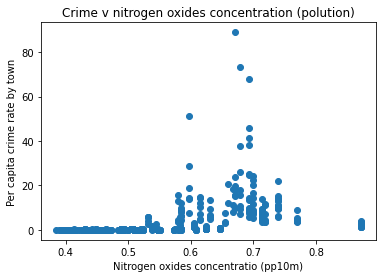

In [216]:
plt.scatter(x=boston['nox'], y=boston['crim'])
plt.title("Crime v nitrogen oxides concentration (polution)")
plt.ylabel("Per capita crime rate by town")
plt.xlabel("Nitrogen oxides concentratio (pp10m)")
plt.show()

## Crime v percentage of poorer residents ##
As the percentage of poorer residents increases, the per capita crime rate by town tends to increase. This is not necessarily causal.

Text(0.5, 1.0, 'Crime v proportion of poorer residents')

Text(0, 0.5, 'Per capita crime rate by town')

Text(0.5, 0, 'Percent poorer residents')

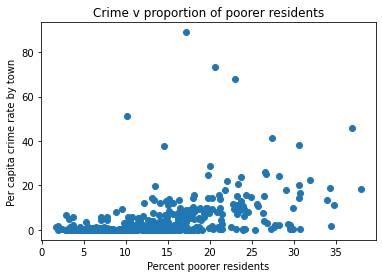

In [217]:
plt.scatter(x=boston['lstat'], y=boston['crim'])
plt.title("Crime v proportion of poorer residents")
plt.ylabel("Per capita crime rate by town")
plt.xlabel("Percent poorer residents")
plt.show()

## Crime v weighted mean distances to employment centers ##
The crime rate is higher in towns that are on average closer to employment centers, though it is unlikely employment centers cause crime. It is much likelier that employment centers are built in areas with higher crime because fewer people are working in higher crime areas.

Text(0.5, 1.0, 'Crime v Weighted mean distance to Boston employment centers')

Text(0.5, 0, 'Weighted mean distances to employment centers')

Text(0, 0.5, 'Per capita crime rate by town')

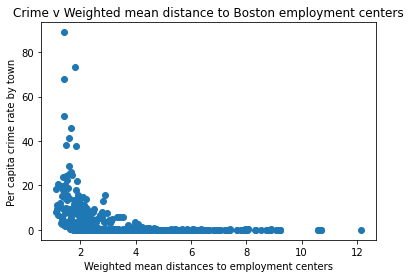

In [218]:
plt.scatter(x=boston['dis'], y=boston['crim'])
plt.title("Crime v Weighted mean distance to Boston employment centers")
plt.xlabel("Weighted mean distances to employment centers")
plt.ylabel("Per capita crime rate by town")
plt.show()

## Problem 10c ##

The percent of poorer residents is associated with higher crime rates, as are higher concentrations of pollution. The per-capita crime rate tends to decrease as median home value increases as well.

## Problem 10d ##

The suburbs of Boston with the highest amount of crime have about 10,000x more crime per-capita than the suburbs with the lowest amount of time. There is an incredibly long tail in the distribution, though this is so large it could be a data error. If it's not, lowering the crime rate in the worst suburbs would have a major effect on crime overall in the Boston area. Still, the 75th percentile is about 50x worse than the 25th percentile, meaning there is a wide disparity in crime rates.

Boston suburbs have a narrower range of full-value property tax rates. The highest rate is about ~4x the lowest.

Some Boston suburbs have pupil-teacher ratios that are much smaller than the majority of suburbs, visible because the minimum is almost 3 standard deviations from the mean while the maximum is just 1.5 standard deviations from the mean. The median is also higher than the mean, meaning the distribution is skewed left.

In [219]:
boston[['crim','tax','ptratio']].describe()

crim         tax     ptratio
count  506.000000  506.000000  506.000000
mean     3.613524  408.237154   18.455534
std      8.601545  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.677082  666.000000   20.200000
max     88.976200  711.000000   22.000000

## Problem 10e ##
35 suburbs in the dataset bound the Charles River

In [220]:
boston.groupby(['chas']).size()

chas
0    471
1     35
dtype: int64

## Problem 10f ##

In [221]:
boston['ptratio'].median()

19.05

## Problem 10g ##
Suburbs 399 and 406 have the lowest median values of owner-occupied homes.

The two suburbs were the median value of owner-occupied homes is lowest have high crime rates (much closer to the max values than the 75th percentile), higher concentrations of nitrogen oxides (>75th percentile), high-property tax rates, lower than average rooms per dwelling, and are both close to employment centers (closer to min than 25th percentile).

In [222]:
boston.describe()

boston.where(boston.medv == boston.medv.min()).dropna()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

crim   zn  indus  chas    nox     rm    age     dis   rad    tax  \
399  38.3518  0.0   18.1   0.0  0.693  5.453  100.0  1.4896  24.0  666.0   
406  67.9208  0.0   18.1   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   

     ptratio   black  lstat  medv  
399     20.2  396.90  30.59   5.0  
406     20.2  384.97  22.98   5.0

## Problem 10h ##


64 suburbs average more than 7 rooms per dwelling and 13 suburbs average more than 8.

In [223]:
len(boston.where(boston.rm > 7).dropna())
len(boston.where(boston.rm > 8).dropna())

64

13

The suburbs that average more than 8 rooms per dwelling have generally low crime rates, don't border the Charles River (where space is presumably more limited, generally), often have high proportions of homes built before 1940, generally have below-average pupil-teacher ratios. Every suburb is in top quartile of suburbs for median value of owner-occupied homes.

In [224]:
boston.where(boston.rm >8).dropna()

crim    zn  indus  chas     nox     rm   age     dis   rad    tax  \
98   0.12083   0.0   2.89   0.0  0.4450  8.069  76.0  3.4952   2.0  276.0   
164  1.51902   0.0  19.58   1.0  0.6050  8.375  93.9  2.1620   5.0  403.0   
205  0.02009  95.0   2.68   0.0  0.4161  8.034  31.9  5.1180   4.0  224.0   
225  0.31533   0.0   6.20   0.0  0.5040  8.266  78.3  2.8944   8.0  307.0   
226  0.52693   0.0   6.20   0.0  0.5040  8.725  83.0  2.8944   8.0  307.0   
227  0.38214   0.0   6.20   0.0  0.5040  8.040  86.5  3.2157   8.0  307.0   
233  0.57529   0.0   6.20   0.0  0.5070  8.337  73.3  3.8384   8.0  307.0   
234  0.33147   0.0   6.20   0.0  0.5070  8.247  70.4  3.6519   8.0  307.0   
254  0.36894  22.0   5.86   0.0  0.4310  8.259   8.4  8.9067   7.0  330.0   
258  0.61154  20.0   3.97   0.0  0.6470  8.704  86.9  1.8010   5.0  264.0   
263  0.52014  20.0   3.97   0.0  0.6470  8.398  91.5  2.2885   5.0  264.0   
268  0.57834  20.0   3.97   0.0  0.5750  8.297  67.0  2.4216   5.0  264.0   
365  3.47428   0.0  18.10   1.0  0.7180  8.780  82.9  1.9047  24.0  666.0   

     ptratio   black  lstat  medv  
98      18.0  396.90   4.21  38.7  
164     14.7  388.45   3.32  50.0  
205     14.7  390.55   2.88  50.0  
225     17.4  385.05   4.14  44.8  
226     17.4  382.00   4.63  50.0  
227     17.4  387.38   3.13  37.6  
233     17.4  385.91   2.47  41.7  
234     17.4  378.95   3.95  48.3  
254     19.1  396.90   3.54  42.8  
258     13.0  389.70   5.12  50.0  
263     13.0  386.86   5.91  48.8  
268     13.0  384.54   7.44  50.0  
365     20.2  354.55   5.29  21.9

## 3.7 Problem 3 ##


a) ii is true - For a fixed value of IQ and GPA, females earn more on average than males. This is because male is coded as 0 for gender and female is coded as 1, while $\hat{\beta}_{3}$, the coefficient for gender, is positive.

b) The predicted salary for a female with IQ 110 and GPA of 4 is $137,100

In [225]:
50 + 4*20 + 0.07*110 + 35 + 0.01*(110*4) - 10*(4*1)

137.1

c) This is false - we don't know if there is little evidence of an interaction effect if we don't know the p-values associated with the coefficients. We know that the magnitude of the interaction is small, but we can't assess confidence on the interaction itself.

## 3.7 Problem 10a, b ##

The intercept signifies that if price is 0, the store is not urban, and the store is not in the United States, the model predicts about 13,044 units in sales.

Urban's coefficient signifies that if the store is urban, it is associated with a slight decrease (approx 20) in unit sales, all else constant.

US's coefficient signifies that if the store is in the US, it is associated with ~1200 more unit sales, all else constant.

Price's coefficient signifies that for every 100 unit (probably dollars) increase in price, the number of units sold decreases by about 55, all else constant.

In [226]:
carseats = pd.read_csv('Carseats.csv', index_col=0)
est = smf.ols('Sales ~ Price + Urban + US', carseats).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        17:15:36   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CarseatSales = 13.0435 + (-0.0219)Urban + 1.2006US + (-0.0545)Price

## 3.7 Problem 10d ##
You can reject the null hypothesis for US and Price based on their p-values of 0, but cannot reject the null hypothesis for the Urban variable

## 3.7 Problem 10e ##

In [227]:
est = smf.ols('Sales ~ Price + US', carseats).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        17:15:36   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.7 Problem 10f ##
The models in a) and e) both have $R^2$ values of .239, so about 24% of the variance in Sales is explained by the predictor variables

## 3.7 Problem 10g ##
The 95% confidence interval for US is [0.692, 1.7089], while for Price it is [-0.065, -0.044]

## 3.7 Problem 10h ##

Nope.

## 3.7 Problem 14

In [228]:
import numpy as np
np.random.seed(0)
x1 = np.random.uniform(size=100)
x1 = pd.Series(x1)
x2 = 0.5 * x1 + np.random.normal(size=100)/10
x2 = pd.Series(x2)
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)
y = pd.Series(y)

data = {'x1': x1,
        'x2': x2,
        'y': y
       }

df = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

y = 2 + b_1 * x1 + 0.3 * x2 + E

b_0 is 2

b_1 is 2

b_2 is 0.3

In [229]:
np.cov(x1,x2)
# The correlation is 0.04144922

array([[0.08395739, 0.04144922],
       [0.04144922, 0.03048784]])

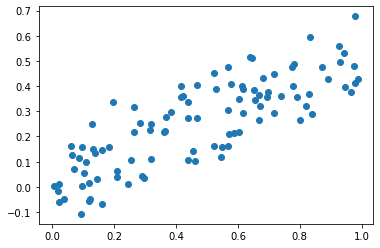

In [230]:
plt.scatter(x=x1, y=x2)
#plt.title("Crime v Weighted mean distance to Boston employment centers")
#plt.xlabel("Weighted mean distances to employment centers")
#plt.ylabel("Per capita crime rate by town")
plt.show()

B_0 = 1.9217
B_1 = 1.2007
B_2 = 1.4931

You can reject the null hypothesis B_1 = 0 at the 5% level because the p-value is less than 0.5

You cannot reject the null hypothesis B_2 = 0 at the 5% level because the p-value is greater than 0.5 and the confidence interval includes 0

In [231]:
est = smf.ols('y ~ x1 + x2', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.16e-07
Time:                        17:15:36   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9217      0.191     10.071      0.000       1.543       2.300
x1             1.2007      0.597      2.011      0.047       0.016       2.385
x2             1.4931      0.991      1.507      0.135      -0.473       3.459
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.026
Skew:                           0.032   Prob(JB):                        0.987
Kurtosis:                       3.046   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.7 Problem 14d ##

Can reject null hypothesis because p-value is 0 and confidence interval does not include 0

In [232]:
est = smf.ols('y ~ x1', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.76e-07
Time:                        17:15:36   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9548      0.191     10.247      0.000       1.576       2.333
x1             1.9378      0.344      5.625      0.000       1.254       2.621
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.050
Skew:                          -0.005   Prob(JB):                        0.975
Kurtosis:                       3.109   Cond. No.                         4.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.7 Problem 14e ##

You can reject the null hypothesis B_2 = 0 because p-value is 0 and confidence interval doesn't include 0

In [233]:
est = smf.ols('y ~ x2', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.29e-07
Time:                        17:15:36   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0721      0.178     11.623      0.000       1.718       2.426
x2             3.1255      0.577      5.419      0.000       1.981       4.270
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.187
Skew:                           0.100   Prob(JB):                        0.911
Kurtosis:                       2.929   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.7 Problem 14f ##
They don't contradict each other because x1 and x2 are collinear. Because x2 is calculated by x1, they are related. Therefore, removing one or the other does not harm the model because the information contained in one is generally contained in the other.

## 3.7 Problem 14g ##

In [234]:
x1 = np.random.uniform(size=100)
np.append(x1, 0.1)
x1 = pd.Series(x1)
x2 = 0.5 * x1 + np.random.normal(size=100)/10
np.append(x2, 0.8)
x2 = pd.Series(x2)
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)
np.append(y, 6)
y = pd.Series(y)

data = {'x1': x1,
        'x2': x2,
        'y': y
       }

df = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

array([0.88204141, 0.45860396, 0.72416764, 0.39902532, 0.90404439,
       0.69002502, 0.69962205, 0.3277204 , 0.75677864, 0.63606106,
       0.24002027, 0.16053882, 0.79639147, 0.9591666 , 0.45813883,
       0.59098417, 0.85772264, 0.45722345, 0.95187448, 0.57575116,
       0.82076712, 0.90884372, 0.81552382, 0.15941446, 0.62889844,
       0.39843426, 0.06271295, 0.42403225, 0.25868407, 0.84903831,
       0.03330463, 0.95898272, 0.35536885, 0.35670689, 0.0163285 ,
       0.18523233, 0.4012595 , 0.92929142, 0.09961493, 0.94530153,
       0.86948853, 0.4541624 , 0.32670088, 0.23274413, 0.61446471,
       0.03307459, 0.01560606, 0.42879572, 0.06807407, 0.25194099,
       0.22116092, 0.25319119, 0.13105523, 0.01203622, 0.1154843 ,
       0.61848026, 0.97425621, 0.990345  , 0.4090541 , 0.16295443,
       0.63876176, 0.49030535, 0.98940978, 0.06530421, 0.78323444,
       0.2883985 , 0.24141862, 0.66250457, 0.24606318, 0.66585912,
       0.51730852, 0.42408899, 0.55468781, 0.28705152, 0.70657

array([ 0.37579135,  0.17718305,  0.17777686,  0.15171526,  0.40405662,
        0.40704834,  0.41965674,  0.16423729,  0.47157416,  0.35202703,
        0.11844193,  0.09636223,  0.37913039,  0.44009835,  0.20229606,
        0.18269095,  0.45690549,  0.12929937,  0.56010036,  0.26292972,
        0.41533306,  0.50380554,  0.47209336, -0.07735511,  0.29375885,
        0.28723502, -0.13845411,  0.25074417, -0.09621439,  0.32226847,
        0.02051537,  0.31381985,  0.07913335,  0.03116994,  0.17297774,
        0.10903894,  0.25735878,  0.4423782 ,  0.01446429,  0.31100335,
        0.40556053,  0.15093198,  0.24914283,  0.23048225,  0.45389022,
        0.10179249, -0.05206236,  0.10280816,  0.11070336,  0.16159978,
       -0.06627339,  0.16214378,  0.1469796 ,  0.01191067,  0.03923678,
        0.22847528,  0.34247464,  0.5752023 ,  0.1736156 ,  0.05813055,
        0.492653  ,  0.31360278,  0.53178739,  0.04685828,  0.54361671,
        0.31615818,  0.21365982,  0.38947474, -0.08642871,  0.34

array([ 4.21572435,  4.9914064 ,  3.03280414,  0.64212394,  4.12860597,
        3.451561  ,  3.00762209,  1.72588213,  3.21584001,  3.55906865,
        2.01275642,  4.76243999,  2.74601768,  3.25724535,  0.68834643,
        3.48826003,  1.83611031,  2.41378208,  3.79610853,  2.52065328,
        5.50500684,  4.96322349,  5.09181252,  1.41320358,  4.4745186 ,
        3.37903997,  2.85529562,  3.95272658,  1.57974057,  3.37043954,
        2.93535987,  1.35649231,  4.24780578,  3.27589683,  2.03884637,
        2.62368399,  1.84979135,  3.64135293,  3.30385349,  5.28192604,
        6.55686927,  2.87967972,  2.06959165,  2.02039897,  2.34705461,
        2.01883217,  2.39832585,  2.85419161,  3.265706  ,  2.31814611,
        2.07498916,  1.97375704,  0.67356982,  0.45987792,  1.0635817 ,
        4.60693117,  4.94651509,  5.52821476,  1.53798122,  0.37472333,
        2.76526309,  3.25051048,  4.63704605,  3.19263806,  4.01383356,
        4.41431323,  2.32432951,  2.52877235,  0.78497954,  2.54

In [235]:
est = smf.ols('y ~ x1 + x2', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     21.96
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.35e-08
Time:                        17:15:36   Log-Likelihood:                -151.87
No. Observations:                 100   AIC:                             309.7
Df Residuals:                      97   BIC:                             317.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8157      0.218      8.346      0.000       1.384       2.247
x1             1.6621      0.726      2.291      0.024       0.222       3.102
x2             1.4198      1.224      1.160      0.249      -1.010       3.850
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.302
Skew:                          -0.007   Prob(JB):                        0.860
Kurtosis:                       2.731   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
est = smf.ols('y ~ x1', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     42.43
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           3.16e-09
Time:                        17:15:36   Log-Likelihood:                -152.56
No. Observations:                 100   AIC:                             309.1
Df Residuals:                      98   BIC:                             314.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7942      0.217      8.263      0.000       1.363       2.225
x1             2.3886      0.367      6.514      0.000       1.661       3.116
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.250
Skew:                          -0.090   Prob(JB):                        0.883
Kurtosis:                       2.835   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
est = smf.ols('y ~ x2', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     37.07
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.22e-08
Time:                        17:15:36   Log-Likelihood:                -154.51
No. Observations:                 100   AIC:                             313.0
Df Residuals:                      98   BIC:                             318.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0668      0.192     10.767      0.000       1.686       2.448
x2             3.8415      0.631      6.089      0.000       2.589       5.094
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.866
Skew:                           0.132   Prob(JB):                        0.649
Kurtosis:                       2.628   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""